In [218]:
import pandas as pd
import os
import glob2
import re
from matplotlib import pyplot as plt

In [219]:
csvs_path = '/Users/kate_fieseler/PycharmProjects/CHIKV-Mac-syndirella-run/csv_output/csvs_sept9_1030' 
metadata = '/Users/kate_fieseler/PycharmProjects/CHIKV-Mac-syndirella-run/fragments/metadata.csv'

In [220]:
def extract_last_number(my_string):
    # Use regex to find a sequence of digits at the end of the string (1-3 digits)
    match = re.search(r'(\d{1,3})$', my_string)
    if match:
        return int(match.group(1))
    else:
        return None  # No digits found

csvs = glob2.glob(csvs_path + '/*.csv')
rows = []
final_df = None
for csv in csvs:
    df = pd.read_csv(csv)
    # add date and time and input
    date = os.path.basename(csv).split('_')[3]
    time = os.path.basename(csv).split('_')[4].split('.')[0]
    input_num = extract_last_number(os.path.basename(csv).split('_')[1])
    df['date'] = date
    df['time'] = time
    df['input_num'] = input_num
    if final_df is None:
        final_df = df
    else:
        # Align the columns of output_df and row_df
        combined_columns = final_df.columns.union(df.columns)
        final_df = final_df.reindex(columns=combined_columns)
        df = df.reindex(columns=combined_columns)
        final_df = pd.concat([final_df, df], ignore_index=True)
df = final_df
df

,1_r1_smiles,1_r2_smiles,1_reaction,2_r1_smiles,2_r2_smiles,2_reaction,3_r1_smiles,3_reaction,4_r1_smiles,4_r2_smiles,...,input_num,num_placed,num_successful,route_uuid,smiles,template,time,to_hippo,total_num_products_enumstereo,total_num_unique_products
0,NC1CCC(=O)NC1,NC(=O)c1ccc(C(=O)O)c(Cl)c1,Amidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44,284.0,173.0,32fgo7,NC(=O)c1ccc(C(=O)N[C@@H]2CCC(=O)NC2)c(Cl)c1,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1802,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac//S...,2546.0,994.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30,NaN,NaN,NaN,CN(C(=O)c1cn[nH]c1)[C@H]1C[C@H](O)NC[C@@H]1NC(...,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1740,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73,NaN,NaN,NaN,Cc1cc2c(c(C)c1-c1cc[nH]n1)N(C)CO2,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1802,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18,NaN,NaN,NaN,C[C@H](c1ccc(N)nc1)c1nc(Cn2ccccc2=O)no1,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1734,NaN,NaN,NaN
4,Nc1ccccc1,COC(=O)c1cccc2c(C(=O)O)c[nH]c12,Amidation,COC(=O)c1cccc2c(C(=O)Nc3ccccc3)c[nH]c12,CN,Ester_amidation,NaN,NaN,NaN,NaN,...,277,10000.0,9780.0,6PQWWH,CNC(=O)c1cccc2c(C(=O)Nc3ccccc3)c[nH]c12,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1523,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac//R...,12100.0,10600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,CNCc1cccc(=O)[nH]1,CCOC(=O)c1cn[nH]c1,Ester_amidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29,2217.0,1356.0,ZzGYCp,CN(Cc1cccc(=O)[nH]1)C(=O)c1cn[nH]c1,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1900,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac//Z...,5721.0,3934.0
348,Cc1ccncc1NC(=O)CCl,Cc1[nH][nH]c(=O)c1CCO,Nucleophilic_substitution_with_amine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58,44.0,31.0,STWk5f,Cc1ccncc1NC(=O)Cn1[nH]c(=O)c(CCO)c1C,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1800,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac//G...,81.0,79.0
349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,320,NaN,NaN,NaN,COCC(=O)N[C@H]1CC[C@@H](O)C[C@]12CCC[C@H](c1cc...,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1026,NaN,NaN,NaN
350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,165,NaN,NaN,NaN,CNc1cc(O)c2cccc(C)c2n1,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,0908,NaN,NaN,NaN


In [221]:
df = df.drop_duplicates(subset=['input_num', 'route_uuid'])
len(df)

351

In [222]:
df.input_num.value_counts()

input_num
10     2
44     1
270    1
291    1
20     1
      ..
146    1
4      1
5      1
95     1
12     1
Name: count, Length: 350, dtype: int64

In [223]:
df[df['input_num'] == 10]

,1_r1_smiles,1_r2_smiles,1_reaction,2_r1_smiles,2_r2_smiles,2_reaction,3_r1_smiles,3_reaction,4_r1_smiles,4_r2_smiles,...,input_num,num_placed,num_successful,route_uuid,smiles,template,time,to_hippo,total_num_products_enumstereo,total_num_unique_products
311,Nc1cnc2[nH]ccc2c1,Cc1[nH][nH]c(=O)c1CC(=O)O,Amidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10,96.0,81.0,Ndgh2a,Cc1[nH][nH]c(=O)c1CC(=O)Nc1cnc2[nH]ccc2c1,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1738,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac//O...,129.0,126.0
312,Nc1cnc2[nH]ccc2c1,Cc1[nH][nH]c(=O)c1CC(=O)O,Amidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10,96.0,77.0,GDNfCh,Cc1[nH][nH]c(=O)c1CC(=O)Nc1cnc2[nH]ccc2c1,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1738,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac//O...,129.0,126.0


Input num `10` has 2 runs, keep the first since there are a higher number of sucessful placements.

In [224]:
df = df.drop_duplicates(subset=['input_num'], keep='first')
df[df['input_num'] == 10]

,1_r1_smiles,1_r2_smiles,1_reaction,2_r1_smiles,2_r2_smiles,2_reaction,3_r1_smiles,3_reaction,4_r1_smiles,4_r2_smiles,...,input_num,num_placed,num_successful,route_uuid,smiles,template,time,to_hippo,total_num_products_enumstereo,total_num_unique_products
311,Nc1cnc2[nH]ccc2c1,Cc1[nH][nH]c(=O)c1CC(=O)O,Amidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10,96.0,81.0,Ndgh2a,Cc1[nH][nH]c(=O)c1CC(=O)Nc1cnc2[nH]ccc2c1,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1738,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac//O...,129.0,126.0


In [225]:
# what ints from 0 to 353 are not included
missing = set(range(354)) - set(list(df.input_num))
missing

{87, 302, 304, 329}

These inputs are missing because there was an error https://github.com/kate-fie/syndirella/issues/61. 

In [226]:
# how many scaffolds had placements
len(df[df['num_placed'] > 0])

79

In [227]:
# add short_code column based on metadata
metadata = pd.read_csv(metadata)
metadata['Long code'] = metadata['Long code'].astype(str)
metadata['Code'] = metadata['Code'].astype(str)
mapping = metadata.set_index('Long code')['Code'].to_dict()
mapping

{'CHIKV_MacB-x0270_A_304_CHIKV_MacB-x0300+A+401+1': 'cx0270a',
 'CHIKV_MacB-x0281_C_304_CHIKV_MacB-x0300+A+401+1': 'cx0281a',
 'CHIKV_MacB-x0289_C_401_CHIKV_MacB-x0300+A+401+1': 'cx0289a',
 'CHIKV_MacB-x0294_A_401_CHIKV_MacB-x0300+A+401+1': 'cx0294a',
 'CHIKV_MacB-x0294_A_501_CHIKV_MacB-x0294+A+501+1': 'cx0294b',
 'CHIKV_MacB-x0294_B_304_CHIKV_MacB-x0300+A+401+1': 'cx0294c',
 'CHIKV_MacB-x0295_A_401_CHIKV_MacB-x0300+A+401+1': 'cx0295a',
 'CHIKV_MacB-x0305_C_304_CHIKV_MacB-x0300+A+401+1': 'cx0305a',
 'CHIKV_MacB-x0312_A_304_CHIKV_MacB-x0300+A+401+1': 'cx0312a',
 'CHIKV_MacB-x0312_C_401_CHIKV_MacB-x0300+A+401+1': 'cx0312b',
 'CHIKV_MacB-x0312_D_401_CHIKV_MacB-x0300+A+401+1': 'cx0312c',
 'CHIKV_MacB-x0314_B_401_CHIKV_MacB-x0300+A+401+1': 'cx0314a',
 'CHIKV_MacB-x0314_C_304_CHIKV_MacB-x0300+A+401+1': 'cx0314b',
 'CHIKV_MacB-x0314_D_401_CHIKV_MacB-x0300+A+401+1': 'cx0314c',
 'CHIKV_MacB-x0316_C_304_CHIKV_MacB-x0300+A+401+1': 'cx0316a',
 'CHIKV_MacB-x0317_C_401_CHIKV_MacB-x0300+A+401+1': 'cx

In [228]:
df['hit1'] = df['hit1'].astype(str)
df['hit1_short'] = df['hit1'].map(mapping)
df['hit2'] = df['hit2'].astype(str)
df['hit2_short'] = df['hit2'].map(mapping)
all_hits = pd.concat([df['hit1_short'], df['hit2_short']])

Text(0, 0.5, 'Frequency')

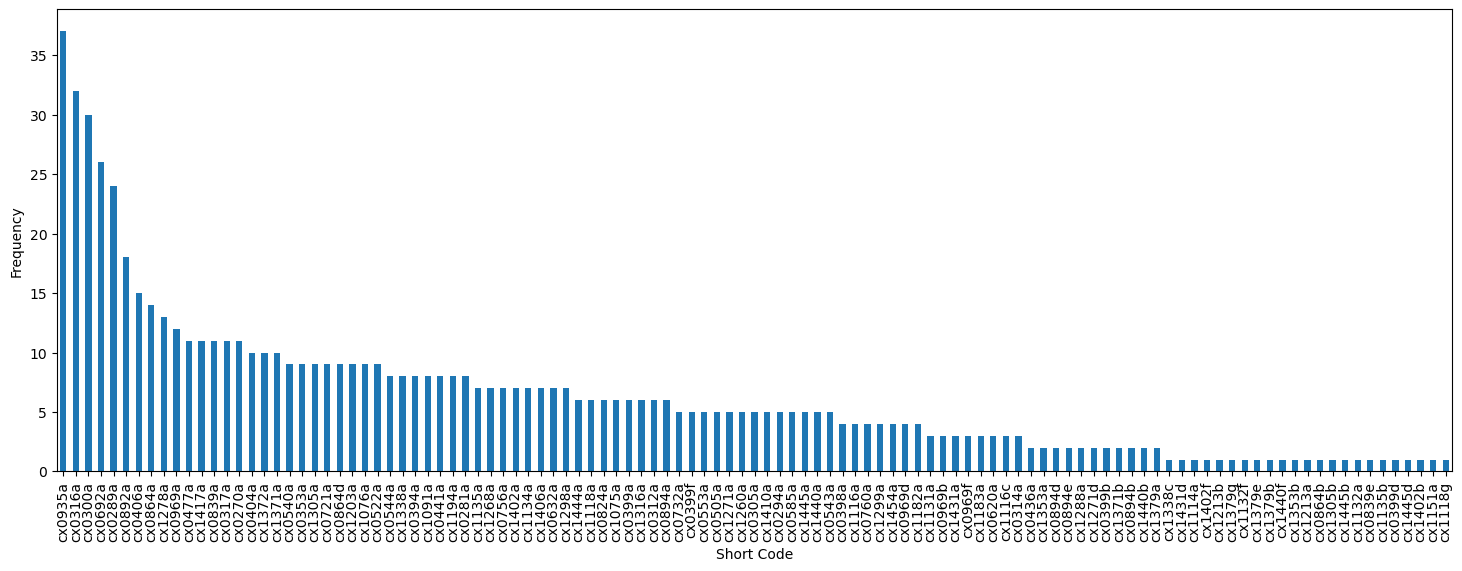

In [229]:
plt.figure(figsize=(18,6))
all_hits.value_counts().plot(kind='bar')
plt.xlabel('Short Code')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

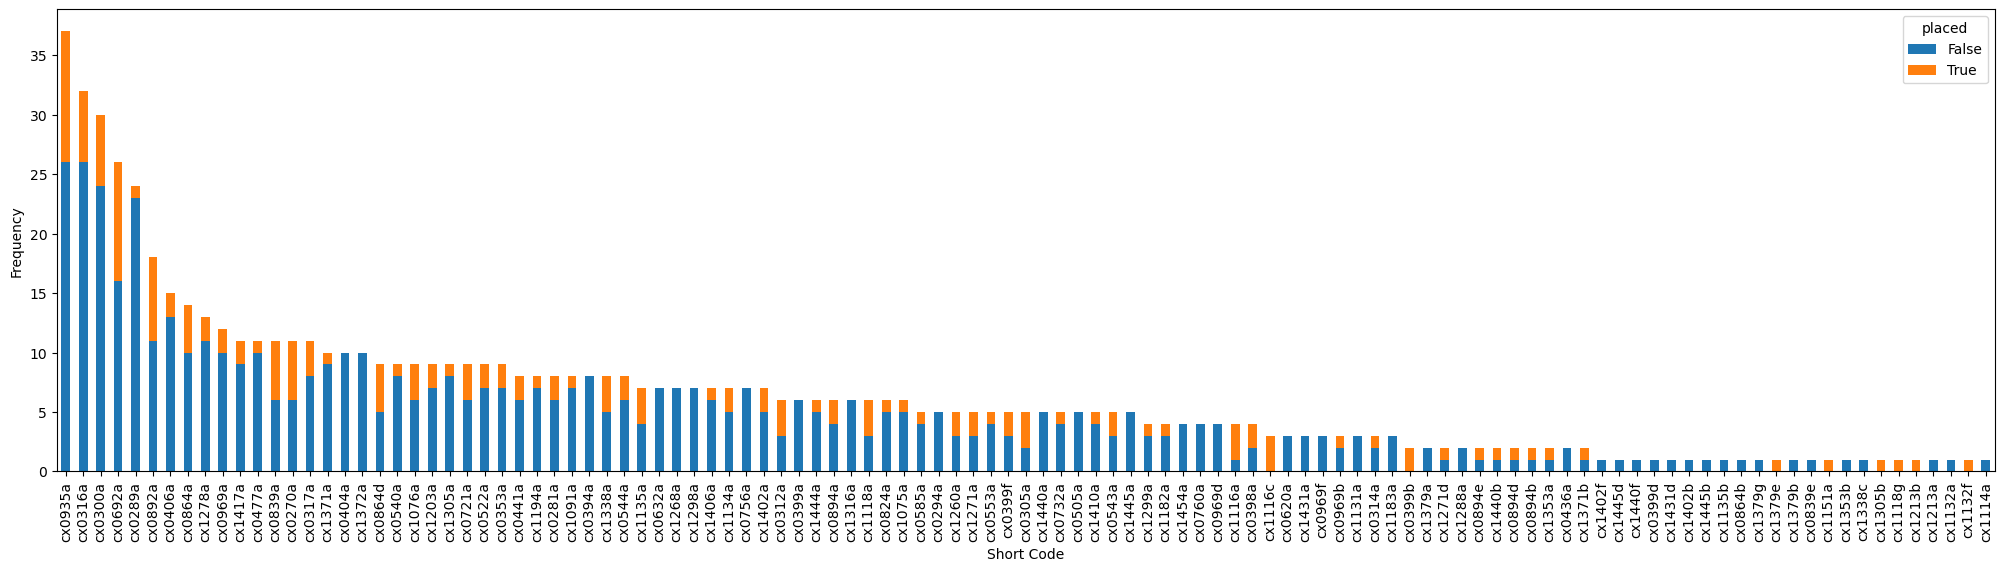

In [230]:
# add 'placed' column
df['placed'] = df['num_placed'] > 0
all_hits = pd.concat([df[['hit1_short', 'placed']], df[['hit2_short', 'placed']].rename(columns={'hit2_short': 'hit1_short'})])
hit_counts = all_hits.groupby(['hit1_short', 'placed']).size().unstack(fill_value=0)
hit_counts['total'] = hit_counts.sum(axis=1)

# Sort by total frequency in descending order
hit_counts = hit_counts.sort_values(by='total', ascending=False)

# Drop the 'total' column, as it was only for sorting
hit_counts = hit_counts.drop(columns='total')

hit_counts.plot(kind='bar', stacked=True, figsize=(25,6))
plt.xlabel('Short Code')
plt.ylabel('Frequency')

In [231]:
# number of unique fragments
len(hit_counts)

111

In [232]:
# number of unique fragments that are placed
hit_counts[hit_counts[True] > 0].shape[0]

70

In [233]:
hit_counts[hit_counts[True]==0].shape[0]

41

In [234]:
hit_counts

placed,False,True
hit1_short,,
cx0935a,26,11
cx0316a,26,6
cx0300a,24,6
cx0692a,16,10
cx0289a,23,1
...,...,...
cx1213b,0,1
cx1213a,1,0
cx1132a,1,0


In [235]:
# number of base compounds with errors
df.error_type.value_counts()

error_type
NoSynthesisRoute          200
SMARTSError                32
ScaffoldPlacementError     26
ReactionError              11
ValueError                  2
Name: count, dtype: int64

In [236]:
# number of base compounds with errors
df.error_type.value_counts().sum()

271

In [237]:
df.num_placed.value_counts()

num_placed
10000.0    15
229.0       3
9884.0      2
439.0       2
689.0       2
4.0         2
284.0       1
1361.0      1
1192.0      1
2312.0      1
1570.0      1
2962.0      1
2541.0      1
2196.0      1
2276.0      1
2.0         1
232.0       1
314.0       1
2640.0      1
653.0       1
6280.0      1
1676.0      1
96.0        1
11.0        1
2782.0      1
292.0       1
1428.0      1
6527.0      1
1300.0      1
815.0       1
2217.0      1
419.0       1
187.0       1
254.0       1
14.0        1
1542.0      1
3290.0      1
2140.0      1
480.0       1
896.0       1
192.0       1
3140.0      1
624.0       1
507.0       1
1064.0      1
3940.0      1
6659.0      1
2033.0      1
3.0         1
1098.0      1
2067.0      1
1950.0      1
3340.0      1
402.0       1
1540.0      1
3152.0      1
3996.0      1
1037.0      1
44.0        1
Name: count, dtype: int64

In [238]:
df.num_placed.value_counts().sum()

79

In [239]:
df['date'] = pd.to_datetime(df['date'])
df['time'] = df['time'].astype(str).str.zfill(4)  # Ensure time is in the format HHMM
df['datetime'] = pd.to_datetime(df['date'].astype(str) + df['time'], format='%Y-%m-%d%H%M')
df['datetime'].min()

Timestamp('2024-09-03 17:10:00')

In [240]:
df['datetime'].max()

Timestamp('2024-09-05 16:16:00')

In [241]:
# total time
df['datetime'].max() - df['datetime'].min()

Timedelta('1 days 23:06:00')

Text(0, 0.5, 'Frequency in all routes')

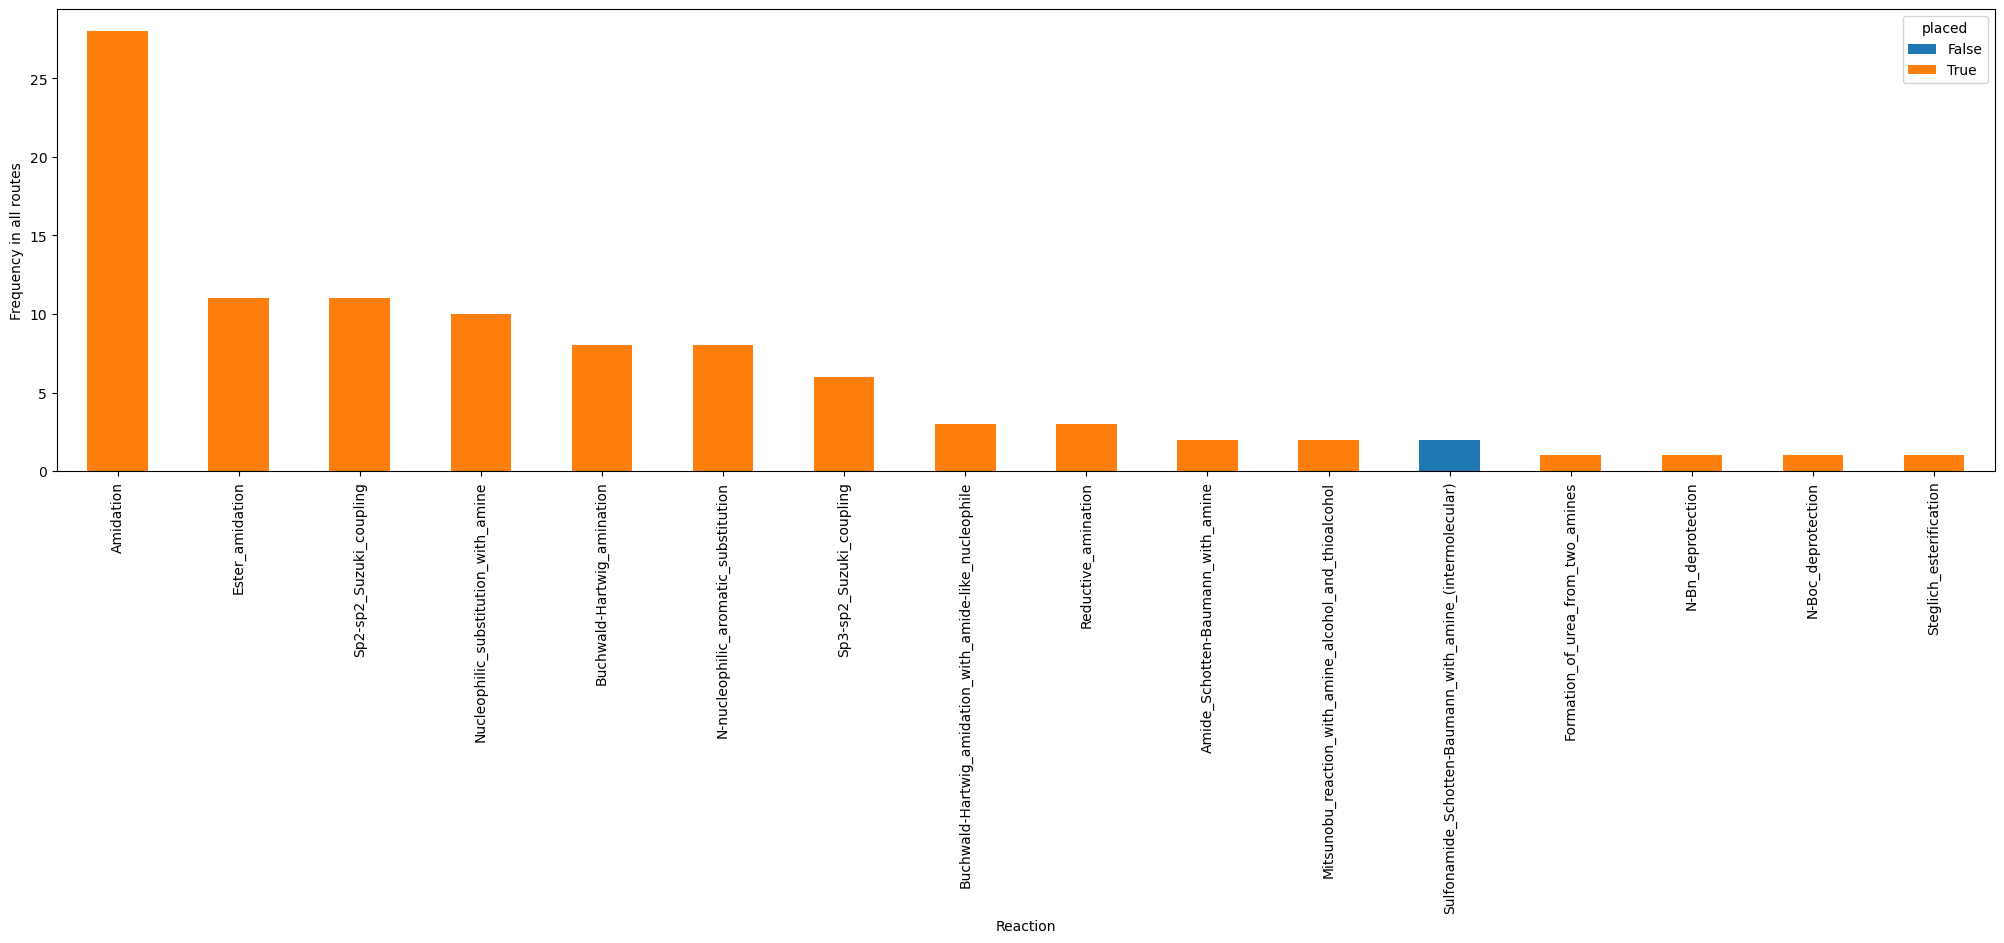

In [242]:
# reaction distribution, 1–4 reaction
all_reactions = pd.concat([df[['1_reaction', 'placed']], df[['2_reaction', 'placed']].rename(columns={'2_reaction':'1_reaction'}), 
                           df[['3_reaction', 'placed']].rename(columns={'3_reaction':'1_reaction'}), df[['4_reaction', 'placed']].rename(columns={'4_reaction':'1_reaction'})])
all_reactions_counts = all_reactions.groupby(['1_reaction', 'placed']).size().unstack(fill_value=0)
all_reactions_counts['total'] = all_reactions_counts.sum(axis=1)

# Sort by total frequency in descending order
all_reactions_counts = all_reactions_counts.sort_values(by='total', ascending=False)

# Drop the 'total' column, as it was only for sorting
all_reactions_counts = all_reactions_counts.drop(columns='total')

all_reactions_counts.plot(kind='bar', stacked=True, figsize=(25, 6))
plt.xlabel('Reaction')
plt.ylabel('Frequency in all routes')

In [243]:
all_reactions_counts

placed,False,True
1_reaction,,
Amidation,0,28
Ester_amidation,0,11
Sp2-sp2_Suzuki_coupling,0,11
Nucleophilic_substitution_with_amine,0,10
Buchwald-Hartwig_amination,0,8
N-nucleophilic_aromatic_substitution,0,8
Sp3-sp2_Suzuki_coupling,0,6
Buchwald-Hartwig_amidation_with_amide-like_nucleophile,0,3
Reductive_amination,0,3


In [263]:
# Identify columns ending with '_reaction'
reaction_columns = [col for col in df.columns if col.endswith('_reaction')]

# Create a new column 'reaction_sum'
df['num_steps'] = df[reaction_columns].apply(lambda row: sum(0 if pd.isna(x) else 1 for x in row), axis=1)

# Display the updated DataFrame
df

,1_r1_smiles,1_r2_smiles,1_reaction,2_r1_smiles,2_r2_smiles,2_reaction,3_r1_smiles,3_reaction,4_r1_smiles,4_r2_smiles,...,template,time,to_hippo,total_num_products_enumstereo,total_num_unique_products,hit1_short,hit2_short,placed,datetime,num_steps
0,NC1CCC(=O)NC1,NC(=O)c1ccc(C(=O)O)c(Cl)c1,Amidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1802,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac//S...,2546.0,994.0,cx1371a,cx0300a,True,2024-09-03 18:02:00,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1740,NaN,NaN,NaN,cx0732a,cx0300a,False,2024-09-03 17:40:00,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1802,NaN,NaN,NaN,cx0864a,cx1194a,False,2024-09-03 18:02:00,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1734,NaN,NaN,NaN,cx1406a,cx0316a,False,2024-09-03 17:34:00,0
4,Nc1ccccc1,COC(=O)c1cccc2c(C(=O)O)c[nH]c12,Amidation,COC(=O)c1cccc2c(C(=O)Nc3ccccc3)c[nH]c12,CN,Ester_amidation,NaN,NaN,NaN,NaN,...,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1523,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac//R...,12100.0,10600.0,cx0692a,cx0399b,True,2024-09-04 15:23:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,CNCc1cccc(=O)[nH]1,CCOC(=O)c1cn[nH]c1,Ester_amidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1900,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac//Z...,5721.0,3934.0,cx0732a,cx1135a,True,2024-09-03 19:00:00,1
348,Cc1ccncc1NC(=O)CCl,Cc1[nH][nH]c(=O)c1CCO,Nucleophilic_substitution_with_amine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1800,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac//G...,81.0,79.0,cx0317a,cx0305a,True,2024-09-03 18:00:00,1
349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1026,NaN,NaN,NaN,cx0864a,cx0935a,False,2024-09-04 10:26:00,0
350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,0908,NaN,NaN,NaN,cx0394a,cx0839a,False,2024-09-04 09:08:00,0


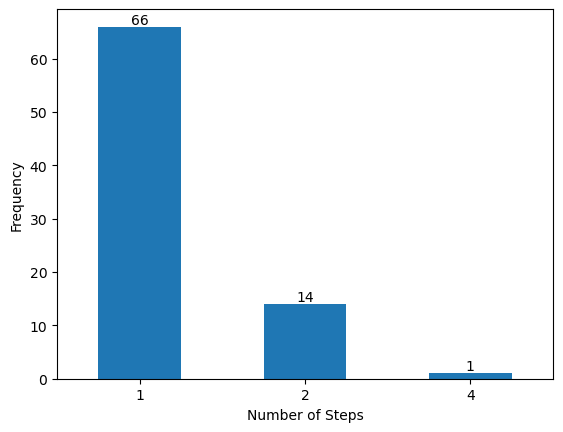

In [264]:
ax = df.num_steps.value_counts()[1:].plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
# Display the number above each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

In [262]:
len(df[df['1_reaction'].notnull()])

81

In [266]:
df.num_successful.sum()

116172.0

In [267]:
df.num_placed.sum()

262688.0

In [268]:
# remove double backslashes from to_hippo paths
df['to_hippo'] = df['to_hippo'].str.replace('//', '/')
df

,1_r1_smiles,1_r2_smiles,1_reaction,2_r1_smiles,2_r2_smiles,2_reaction,3_r1_smiles,3_reaction,4_r1_smiles,4_r2_smiles,...,template,time,to_hippo,total_num_products_enumstereo,total_num_unique_products,hit1_short,hit2_short,placed,datetime,num_steps
0,NC1CCC(=O)NC1,NC(=O)c1ccc(C(=O)O)c(Cl)c1,Amidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1802,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac/SM...,2546.0,994.0,cx1371a,cx0300a,True,2024-09-03 18:02:00,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1740,NaN,NaN,NaN,cx0732a,cx0300a,False,2024-09-03 17:40:00,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1802,NaN,NaN,NaN,cx0864a,cx1194a,False,2024-09-03 18:02:00,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1734,NaN,NaN,NaN,cx1406a,cx0316a,False,2024-09-03 17:34:00,0
4,Nc1ccccc1,COC(=O)c1cccc2c(C(=O)O)c[nH]c12,Amidation,COC(=O)c1cccc2c(C(=O)Nc3ccccc3)c[nH]c12,CN,Ester_amidation,NaN,NaN,NaN,NaN,...,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1523,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac/RT...,12100.0,10600.0,cx0692a,cx0399b,True,2024-09-04 15:23:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,CNCc1cccc(=O)[nH]1,CCOC(=O)c1cn[nH]c1,Ester_amidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1900,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac/ZJ...,5721.0,3934.0,cx0732a,cx1135a,True,2024-09-03 19:00:00,1
348,Cc1ccncc1NC(=O)CCl,Cc1[nH][nH]c(=O)c1CCO,Nucleophilic_substitution_with_amine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1800,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac/GQ...,81.0,79.0,cx0317a,cx0305a,True,2024-09-03 18:00:00,1
349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,1026,NaN,NaN,NaN,cx0864a,cx0935a,False,2024-09-04 10:26:00,0
350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac-sy...,0908,NaN,NaN,NaN,cx0394a,cx0839a,False,2024-09-04 09:08:00,0


In [269]:
df.to_csv('/Users/kate_fieseler/PycharmProjects/CHIKV-Mac-syndirella-run/sept9_syndirella_final_output.csv', index=False)